In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Step 1: Load the dataset
file_path = "/kaggle/input/twitter-tweet-dataset-for-airline-reviews/training_twitter_x_y_train.csv"
df = pd.read_csv(file_path)
print("Dataset Loaded Successfully!\n")
print(df.head())  # Display first few rows

Dataset Loaded Successfully!

             tweet_id airline_sentiment    airline airline_sentiment_gold  \
0  567900433542488064          negative  Southwest                    NaN   
1  569989168903819264          positive  Southwest                    NaN   
2  568089179520954368          positive     United                    NaN   
3  568928195581513728          negative  Southwest                    NaN   
4  568594180014014464          negative     United                    NaN   

            name negativereason_gold  retweet_count  \
0  ColeyGirouard                 NaN              0   
1  WalterFaddoul                 NaN              0   
2      LocalKyle                 NaN              0   
3    amccarthy19                 NaN              0   
4        J_Okayy                 NaN              0   

                                                text tweet_coord  \
0  @SouthwestAir I am scheduled for the morning, ...         NaN   
1  @SouthwestAir seeing your workers tim

In [3]:
# Step 2: Data Preprocessing - Cleaning the text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()  # Remove leading/trailing spaces
    return text

In [4]:
# Apply the cleaning function to the text column
df['clean_text'] = df['text'].apply(clean_text)
print("Text Cleaning Completed!\n")
print(df[['text', 'clean_text']].head())  # Display cleaned text


Text Cleaning Completed!

                                                text  \
0  @SouthwestAir I am scheduled for the morning, ...   
1  @SouthwestAir seeing your workers time in and ...   
2  @united Flew ORD to Miami and back and  had gr...   
3     @SouthwestAir @dultch97 that's horse radish 😤🐴   
4  @united so our flight into ORD was delayed bec...   

                                          clean_text  
0  i am scheduled for the morning  days after the...  
1  seeing your workers time in and time out going...  
2  flew ord to miami and back and  had great crew...  
3                                 thats horse radish  
4  so our flight into ord was delayed because of ...  


In [5]:
# Step 3: Convert text into numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words
X = vectorizer.fit_transform(df['clean_text'])

In [6]:
# Encode sentiment labels into numbers
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
y = df['airline_sentiment'].map(sentiment_mapping)
print("Text Converted to Numerical Format!\n")

Text Converted to Numerical Format!



In [7]:
# Step 4: Train a Simple Machine Learning Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Model Training Completed!\n")

Model Training Completed!



In [8]:
# Step 5: Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive'])
print(f"Model Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:\n", classification_rep)

Model Accuracy: 79.69%

Classification Report:
               precision    recall  f1-score   support

    Negative       0.81      0.95      0.87      1370
     Neutral       0.70      0.49      0.58       466
    Positive       0.84      0.62      0.71       360

    accuracy                           0.80      2196
   macro avg       0.78      0.69      0.72      2196
weighted avg       0.79      0.80      0.78      2196



In [9]:
# Step 6: Make Predictions on New Tweets
def predict_sentiment(new_text):
    cleaned_text = clean_text(new_text)
    transformed_text = vectorizer.transform([cleaned_text])
    prediction = model.predict(transformed_text)[0]
    sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    return sentiment_labels[prediction]

In [10]:
# Example Prediction
sample_tweet = "I had a great experience with this airline!"
print(f"Sample Prediction: {predict_sentiment(sample_tweet)}")

Sample Prediction: Positive


In [12]:
# Interactive User Input
def interactive_sentiment_analysis():
    while True:
        user_input = input("Enter a tweet (or type 'exit' to stop): ")
        if user_input.lower() == 'exit':
            print("Exiting the sentiment analysis.")
            break
        sentiment = predict_sentiment(user_input)
        print(f"Predicted Sentiment: {sentiment}\n")


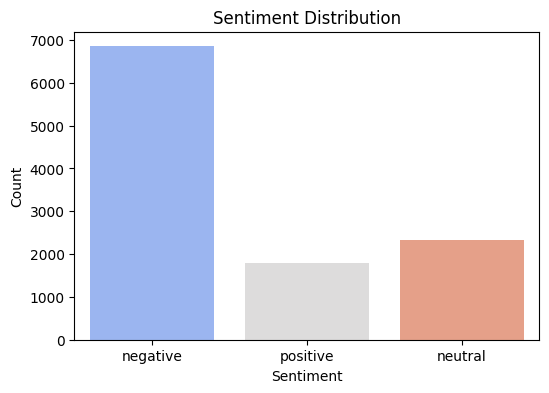

In [14]:
# Step 7: Data Visualization
# Sentiment Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x=df['airline_sentiment'], palette='coolwarm')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [16]:
!pip install wordcloud


In [17]:
from wordcloud import WordCloud
def generate_wordcloud(sentiment):
    text = " ".join(df[df['airline_sentiment'] == sentiment]['clean_text'])
    if not text:
        print(f"No data available for {sentiment} sentiment.")
        return
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Most Common Words in {sentiment.capitalize()} Tweets")
    plt.show()


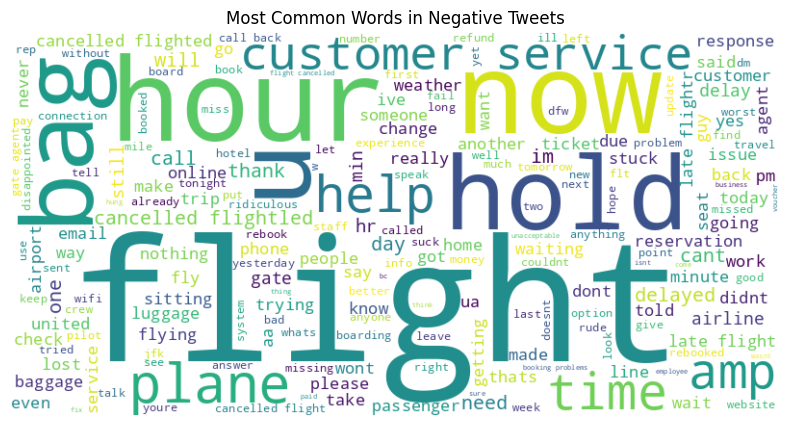

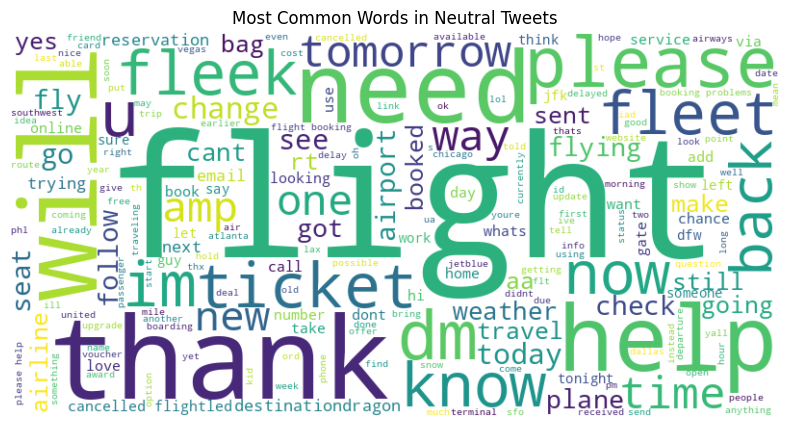

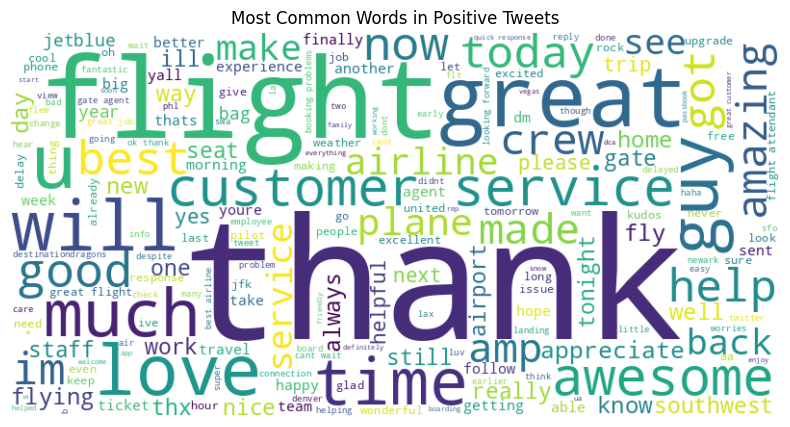

Enter a tweet (or type 'exit' to stop):  thank you


In [ ]:
# Generate Word Clouds
for sentiment in ['negative', 'neutral', 'positive']:
    generate_wordcloud(sentiment)

# Run the interactive function
interactive_sentiment_analysis()